In [ ]:
import pandas as pd
import warnings
import numpy as np
import random
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

warnings.filterwarnings("ignore")

!pip install kaggle

cred = {"username":"akmalariq9","key":"226c6c52a4e488b79657373a7aeedfd3"}

!mkdir ~/.kaggle/
!touch ~/.kaggle/kaggle.json

import json
api_token = cred

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [ ]:
!kaggle datasets download -d imakash3011/customer-personality-analysis

!unzip customer-personality-analysis.zip

customer-personality-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  customer-personality-analysis.zip
replace marketing_campaign.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: marketing_campaign.csv  


In [ ]:
df = pd.read_csv('/content/marketing_campaign.csv', delimiter="\t")

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [ ]:
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [ ]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y", errors="coerce")

In [ ]:
df["Dt_Customer"].info()

<class 'pandas.core.series.Series'>
Index: 2216 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2216 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 34.6 KB


### Exploratory data analysis (EDA) and Vizualitation

In [ ]:
data = df.copy()

data['Age'] = 2024 - data['Year_Birth']

In [ ]:
data['outcome'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

In [ ]:
data = data.rename(columns={'NumWebPurchases': 'Web',
                            'NumCatalogPurchases':'Catalog',
                            'NumStorePurchases':'Store',
                            'MntWines': "Wines",
                            'MntFruits':'Fruits',
                            'MntMeatProducts':'Meat',
                            'MntFishProducts':'Fish',
                            'MntSweetProducts':'Sweets',
                            'MntGoldProds':'Gold',
                            'NumDealsPurchases':'Deals'
                            })

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 2216 non-null   int64         
 1   Year_Birth         2216 non-null   int64         
 2   Education          2216 non-null   object        
 3   Marital_Status     2216 non-null   object        
 4   Income             2216 non-null   float64       
 5   Kidhome            2216 non-null   int64         
 6   Teenhome           2216 non-null   int64         
 7   Dt_Customer        2216 non-null   datetime64[ns]
 8   Recency            2216 non-null   int64         
 9   Wines              2216 non-null   int64         
 10  Fruits             2216 non-null   int64         
 11  Meat               2216 non-null   int64         
 12  Fish               2216 non-null   int64         
 13  Sweets             2216 non-null   int64         
 14  Gold         

In [ ]:
map = {'Divorced': 0, 'Single': 0, 'Alone': 0, 'Absurd': 0, 'Widow': 0, 'YOLO': 0, 'Married': 1,'Together': 1}
data.Marital_Status.replace(map, inplace=True)

In [ ]:
data['Marital_Status'].unique()

array([0, 1])

In [ ]:
map = {'Basic': 0, '2n Cycle': 0, 'Graduation': 1, 'Master': 1, 'PhD': 1}
data.Education.replace(map, inplace=True)

In [ ]:
data['Education'].unique()

array([1, 0])

In [ ]:
data['Children'] = data['Kidhome'] + data['Teenhome']

In [ ]:
def has_chid_or_no(x):
    if x > 0:
        return "1"
    else :
        return "0"

data['Has_child'] = data["Children"].apply(has_chid_or_no)

In [ ]:
data['Has_child'].value_counts()

Has_child
1    1583
0     633
Name: count, dtype: int64

In [ ]:
data['All_campaigns'] = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

In [ ]:
data['All_campaigns'].value_counts().to_frame()

,count
All_campaigns,
0,1757
1,323
2,81
3,44
4,11


In [ ]:
drop_column = ['ID', 'Year_Birth' ,'Kidhome','Teenhome', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','AcceptedCmp1', 'AcceptedCmp2', 'Z_CostContact', 'Z_Revenue', 'All_campaigns']
data.drop(drop_column, inplace=True, axis=1)
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Deals', 'Web',
       'Catalog', 'Store', 'NumWebVisitsMonth', 'Complain', 'Response', 'Age',
       'outcome', 'Children', 'Has_child'],
      dtype='object')

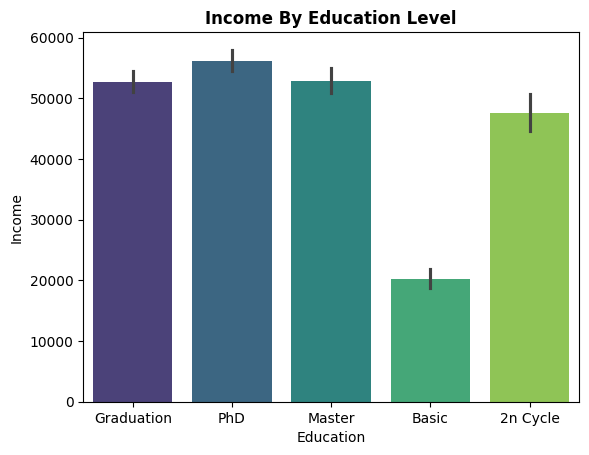

In [ ]:
import seaborn as sns

sns.barplot(x="Education", y="Income", palette="viridis", data=df)
plt.title("Income by Education level".title() , weight="bold")
plt.show()

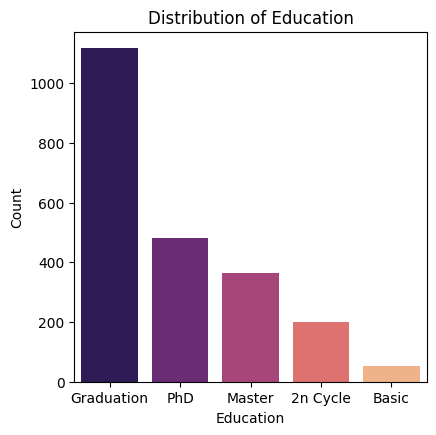

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='Education', data=df, order=df['Education'].value_counts().index, palette='magma')
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Count')

plt.show()

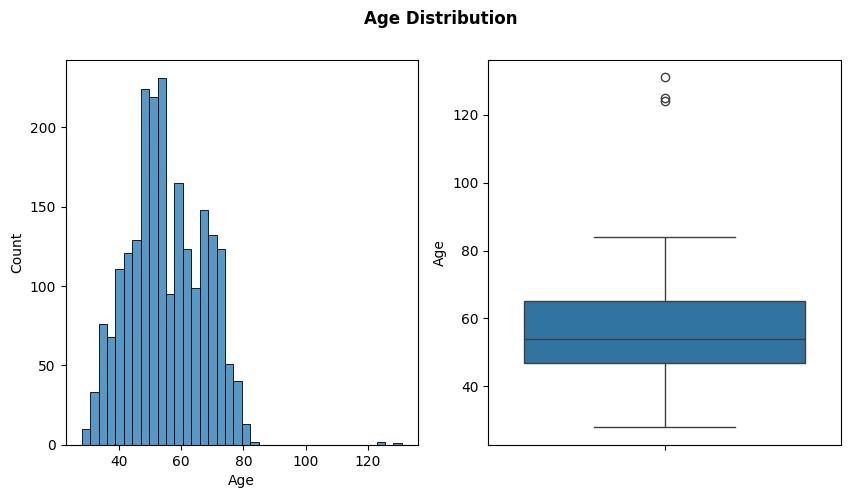

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
sns.histplot(ax=ax[0], data=data, x="Age")
sns.boxplot(ax=ax[1], data=data, y="Age")
fig.suptitle('Age Distribution', weight="bold")
plt.show()

In [ ]:
age_mean = data['Age'].mean()
data.loc[data['Age'] > 85,'Age'] = age_mean

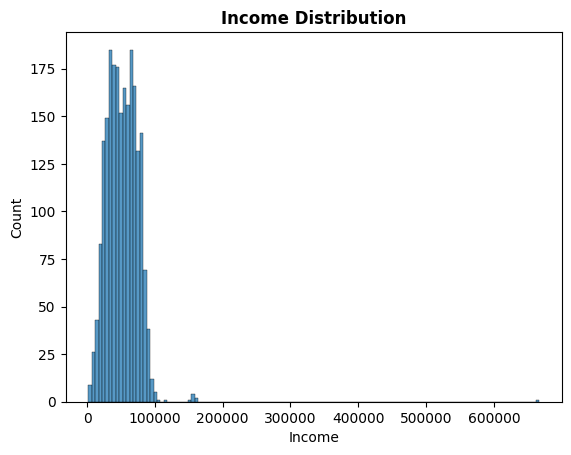

In [ ]:
sns.histplot(data=data, x="Income")
plt.title("Income Distribution", weight="bold")
plt.show()

In [ ]:
products = data[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']]
products.describe()

,Wines,Fruits,Meat,Fish,Sweets,Gold
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253
std,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000
50%,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000
75%,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000


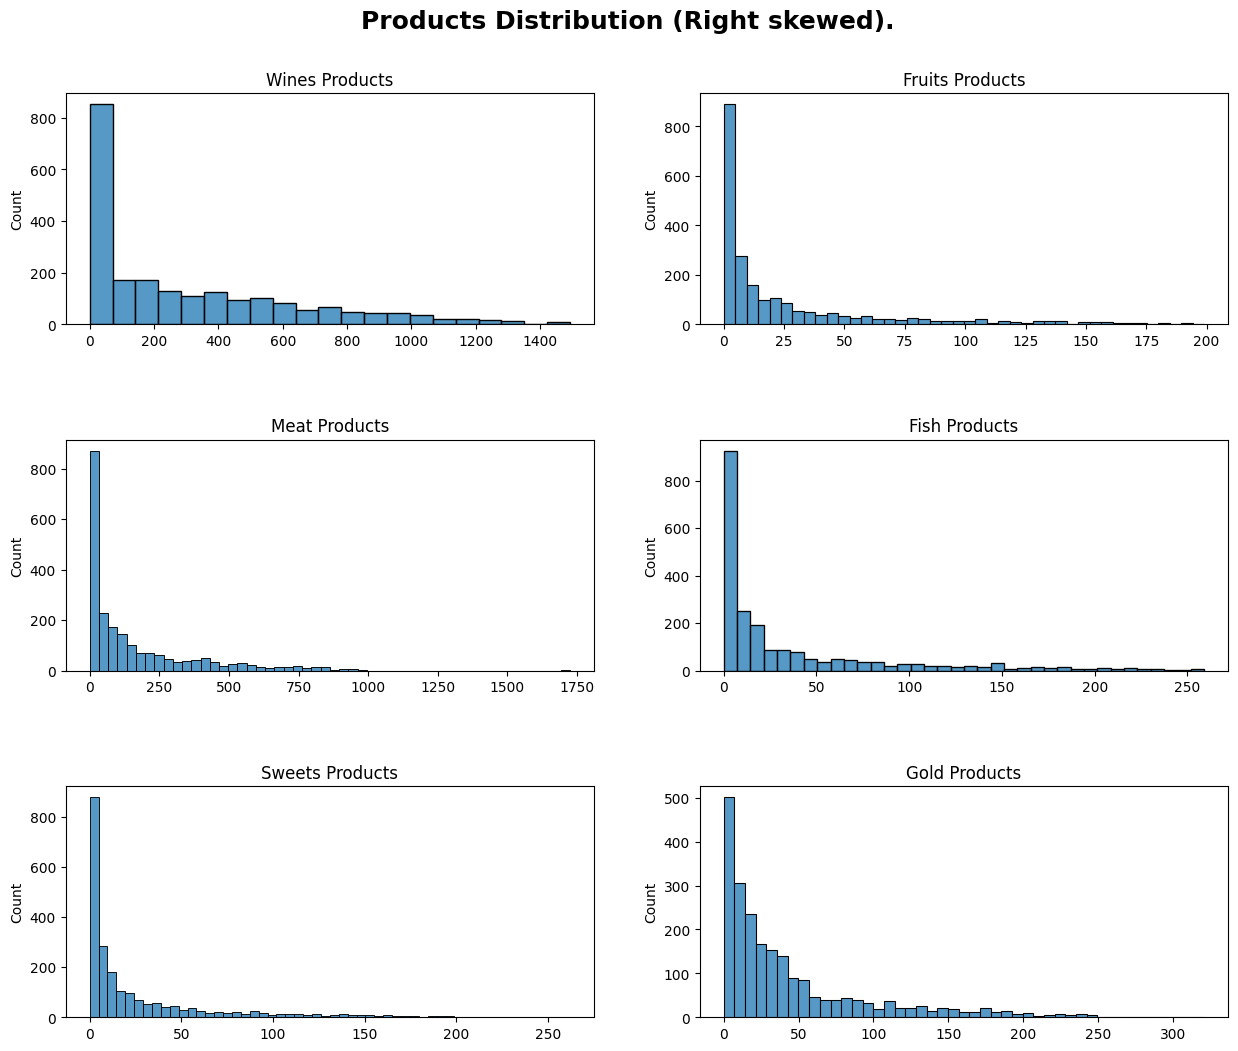

In [ ]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Products Distribution (Right skewed).", fontsize=18, y=0.95, weight="bold")

for i, product in enumerate(products.columns.tolist()):
    ax = plt.subplot(3, 2, i + 1)
    sns.histplot(ax=ax, data=products, x=products[product])
    ax.set_title(f"{product} Products")
    ax.set_xlabel("")

plt.show()

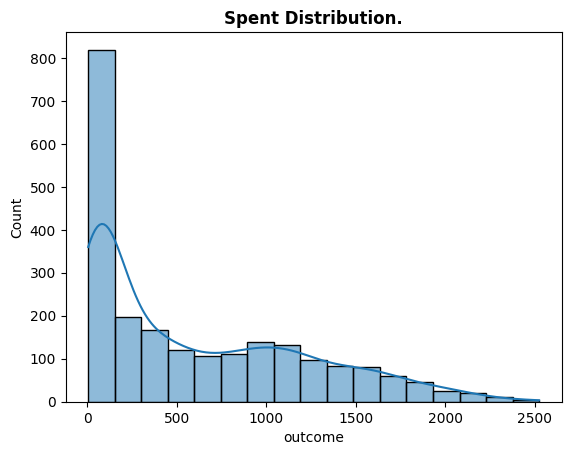

In [ ]:
sns.histplot(data=data, x="outcome", kde=True, edgecolor="black")
plt.title("Spent Distribution.", weight="bold")
plt.show()

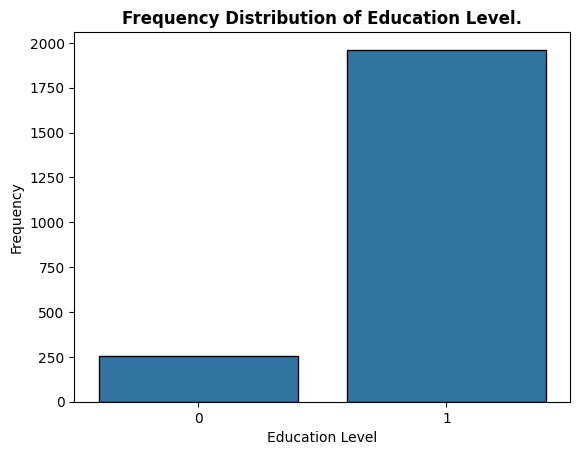

In [ ]:
sns.countplot(data=data, x="Education",edgecolor="black")
plt.title("Frequency Distribution of Education Level.", weight="bold")
plt.xlabel("Education Level")
plt.ylabel("Frequency")
plt.show()

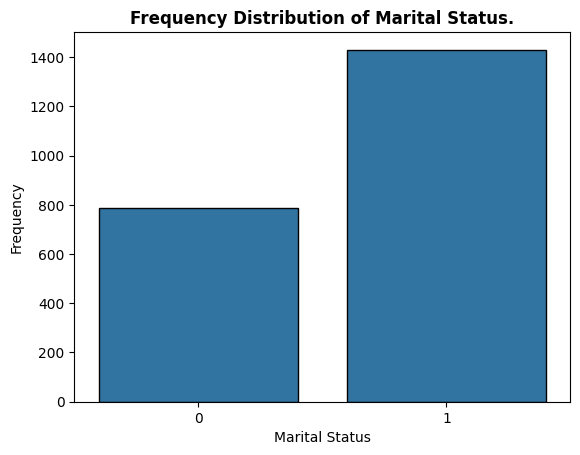

In [ ]:
sns.countplot(data=data, x="Marital_Status", edgecolor="black")
plt.title("Frequency Distribution of Marital Status.", weight="bold")
plt.xlabel("Marital Status")
plt.ylabel("Frequency")
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Education          2216 non-null   int64         
 1   Marital_Status     2216 non-null   int64         
 2   Income             2216 non-null   float64       
 3   Dt_Customer        2216 non-null   datetime64[ns]
 4   Recency            2216 non-null   int64         
 5   Wines              2216 non-null   int64         
 6   Fruits             2216 non-null   int64         
 7   Meat               2216 non-null   int64         
 8   Fish               2216 non-null   int64         
 9   Sweets             2216 non-null   int64         
 10  Gold               2216 non-null   int64         
 11  Deals              2216 non-null   int64         
 12  Web                2216 non-null   int64         
 13  Catalog            2216 non-null   int64         
 14  Store        

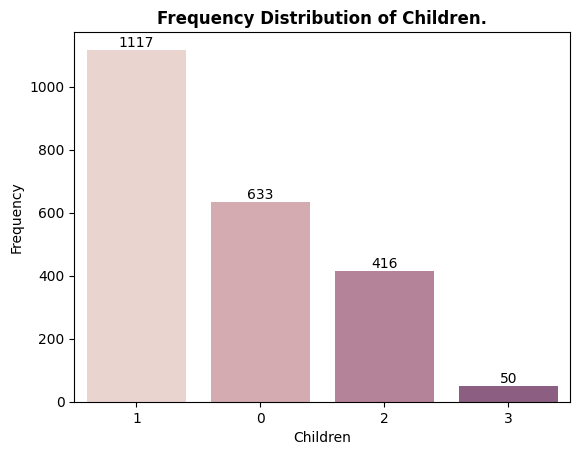

In [ ]:
ax = sns.countplot(data=data, x="Children", order = data['Children'].value_counts().index, palette=sns.cubehelix_palette())
for label in ax.containers:
    ax.bar_label(label)
plt.title("Frequency Distribution of Children.", weight="bold")
plt.xlabel("Children")
plt.ylabel("Frequency")
plt.show()

In [ ]:
import plotly.express as px

px.histogram(data,
             x="Has_child",
             color_discrete_sequence=px.colors.qualitative.Antique,
             title= "Visualizing Has Child")

In [ ]:
# ax = sns.countplot(data=data, x="Total_Campaigns", palette=sns.cubehelix_palette())
# for label in ax.containers:
#     ax.bar_label(label)
# plt.title("Visualizing Campaigns Accepted Frequencies", weight="bold")
# plt.xlabel("Campaigns Accepted")
# plt.ylabel("Frequency")
# plt.show()

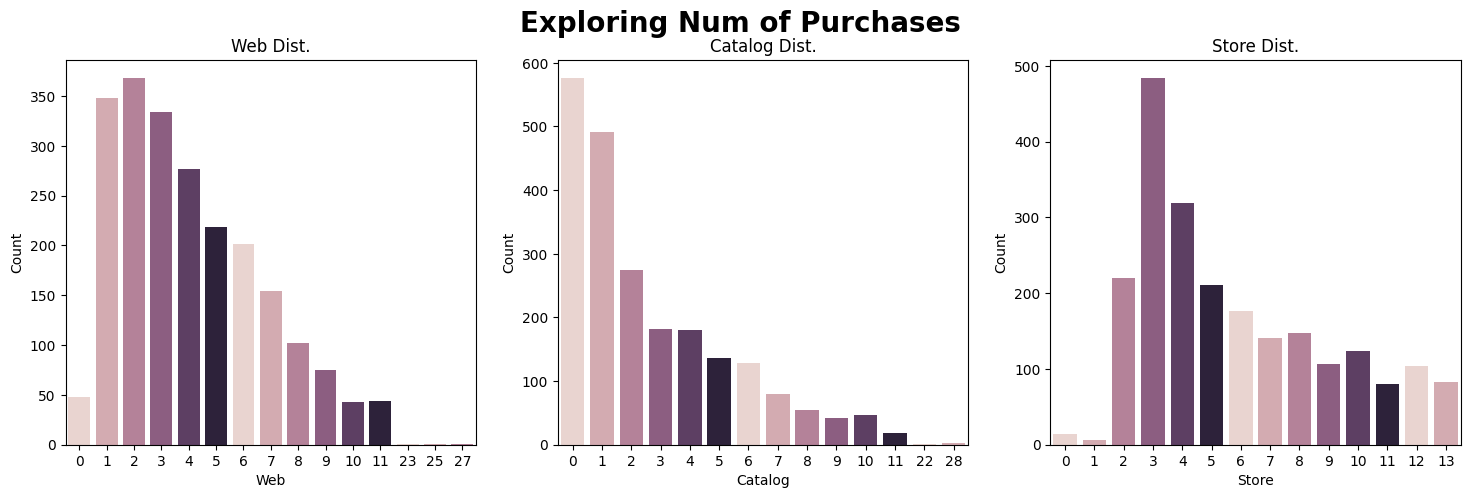

In [ ]:
place_to_buy = ['Web', 'Catalog', 'Store']

fig, ax = plt.subplots(1, 3, figsize = (18,5))
plt.suptitle("Exploring Num of Purchases", fontsize=20, weight="bold")

for i in range(3):
    sns.countplot(ax=ax[i], data=data, x=place_to_buy[i], palette=sns.cubehelix_palette())
    ax[i].set_title(f"{place_to_buy[i]} Dist.")
    ax[i].set_ylabel("Count")

plt.show()

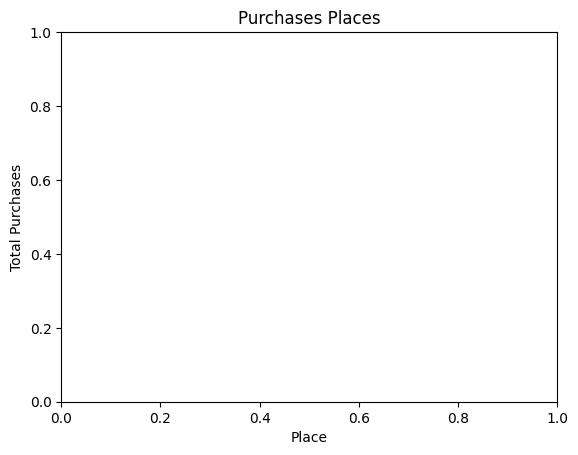

In [ ]:
total_purchases = data[['Web', 'Catalog', 'Store']].sum()

plt.title("Purchases places".title())
plt.xlabel("Place")
plt.ylabel("Total Purchases")
plt.xticks(rotation=0)
plt.show()

In [ ]:
data.groupby('Marital_Status')['outcome'].sum().to_frame()

,outcome
Marital_Status,
0,489525
1,855754


In [ ]:
products_list = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
l = data.groupby('Marital_Status')[products_list].sum()

fig = px.bar(data_frame=l.reset_index(), x='Marital_Status',
            y=['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'],
            barmode="group", title="Marital Status by Products Purchase")
fig.show()

In [ ]:
data.groupby("Education")["Income"].sum().to_frame()

,Income
Education,
0,10623176.0
1,105156733.0


### K-Mean Time!

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Education          2216 non-null   int64         
 1   Marital_Status     2216 non-null   int64         
 2   Income             2216 non-null   float64       
 3   Dt_Customer        2216 non-null   datetime64[ns]
 4   Recency            2216 non-null   int64         
 5   Wines              2216 non-null   int64         
 6   Fruits             2216 non-null   int64         
 7   Meat               2216 non-null   int64         
 8   Fish               2216 non-null   int64         
 9   Sweets             2216 non-null   int64         
 10  Gold               2216 non-null   int64         
 11  Deals              2216 non-null   int64         
 12  Web                2216 non-null   int64         
 13  Catalog            2216 non-null   int64         
 14  Store        

In [ ]:
cols_drop = ['Complain', 'Response', 'Dt_Customer', 'Has_child']
data.drop(cols_drop, axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

X = data.values[:, :]
X = np.nan_to_num(X)
scaler = StandardScaler()
X = scaler.fit_transform(X)

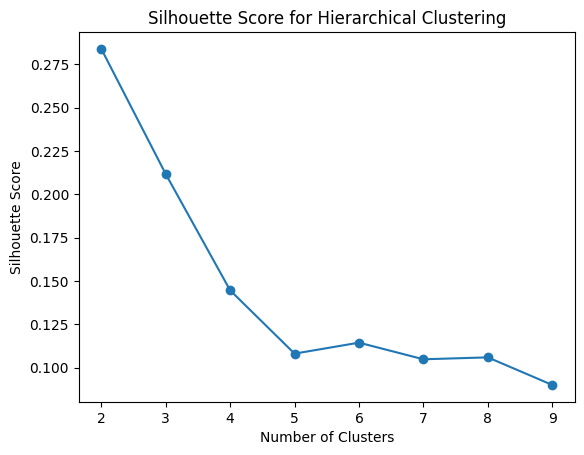

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Evaluate silhouette score for different numbers of clusters
silhouette_scores = []
for n_clusters in range(2, 10):  # Try different numbers of clusters
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    labels = hierarchical.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# Plot silhouette scores
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Score for Hierarchical Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
clusterNum = 4
hierarchical = AgglomerativeClustering(n_clusters=clusterNum)

labels = hierarchical.fit_predict(X)

data["cluster"] = labels

print(data)

      Education  Marital_Status   Income  Recency  Wines  Fruits  Meat  Fish  \
0             1               0  58138.0       58    635      88   546   172   
1             1               0  46344.0       38     11       1     6     2   
2             1               1  71613.0       26    426      49   127   111   
3             1               1  26646.0       26     11       4    20    10   
4             1               1  58293.0       94    173      43   118    46   
...         ...             ...      ...      ...    ...     ...   ...   ...   
2235          1               1  61223.0       46    709      43   182    42   
2236          1               1  64014.0       56    406       0    30     0   
2237          1               0  56981.0       91    908      48   217    32   
2238          1               1  69245.0        8    428      30   214    80   
2239          1               1  52869.0       40     84       3    61     2   

      Sweets  Gold  Deals  Web  Catalog

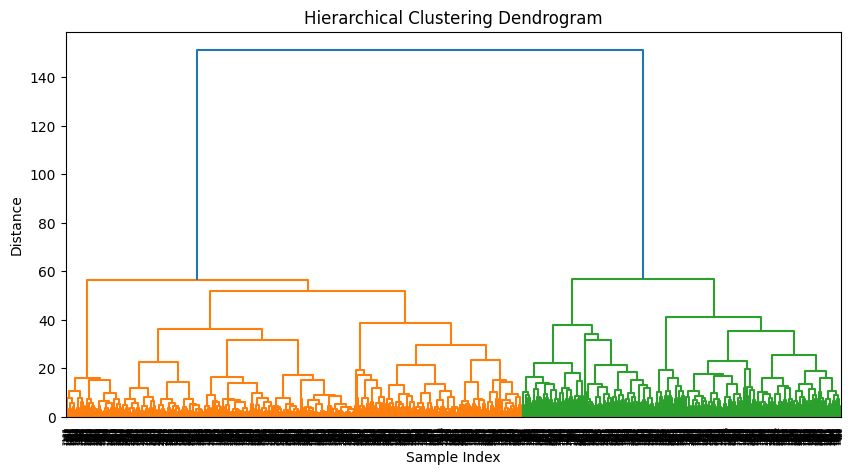

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(X, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

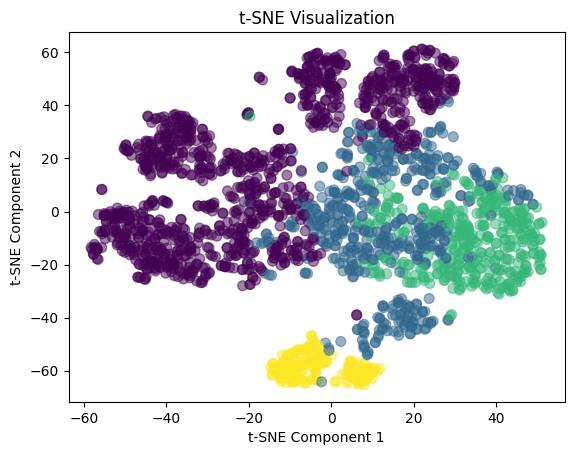

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels,
            cmap='viridis', s=50, alpha=0.5)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [ ]:
data.groupby('cluster').mean()

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Deals,Web,Catalog,Store,NumWebVisitsMonth,Age,outcome,Children
cluster,,,,,,,,,,,,,,,,,,
0,0.996507,0.662882,40661.517904,47.029694,115.263755,6.391266,43.288210,9.970306,6.963319,23.304803,2.659389,3.127511,0.965066,4.084716,6.358952,54.733624,205.181659,1.293450
1,0.836158,0.629002,65272.225989,51.097928,513.359699,41.212806,231.741996,59.227872,40.796610,71.256121,2.384181,6.009416,4.380414,8.615819,4.442561,58.139360,957.595104,0.704331
2,0.994723,0.598945,79469.298153,51.451187,709.688654,73.699208,514.168865,102.593668,76.538259,79.094987,1.372032,5.242744,6.372032,8.208443,2.897098,54.974089,1555.783641,0.211082
3,0.000000,0.683230,27602.826087,50.496894,15.776398,7.894410,15.981366,10.285714,7.776398,18.192547,1.975155,1.826087,0.453416,3.055901,6.515528,47.741362,75.906832,1.018634
